# Google Sunroof Analysis - Get your Power from the Sun

### Introduction

#### Google Sunroof Data:

As the price of installing solar has gotten less expensive, more homeowners are turning to it as a possible option for decreasing their energy bill. We want to make installing solar panels easy and understandable for anyone. Project Sunroof puts Google's expansive data in mapping and computing resources to use, helping calculate the best solar plan for you. Project Sunroof computes how much sunlight hits your roof in a year. It takes into account: Google's database of imagery and maps 3D modeling of your roof Shadows cast by nearby structures and trees All possible sun positions over the course of a year Historical cloud and temperature patterns that might affect solar energy production. Data is available state wise, city wise, county wise, census wise on https://www.google.com/get/sunroof. I have used state and city data for my analysis.

The data contains the following columns:
																
* region_name :	Region name (census tract, zip code, city, county, state)
* count_qualified:	# of buildings in Google Maps that are suitable for solar
* percent_covered:	% of buildings in Google Maps covered by Project Sunroof
* percent_qualified:	% of buildings covered by Project Sunroof that are suitable for solar
* yearly_sunlight_kwh_kw_threshold_avg:	75% of the optimimum sunlight in the county containing that zip code
* yearly_sunlight_kwh_total:	total solar energy generation potential for all roof space in that region
* yearly_sunlight_kwh_f:	total solar energy generation potential for flat roof space in that region
* yearly_sunlight_kwh_n:	total solar energy generation potential for north-facing roof space in that region
* yearly_sunlight_kwh_e:	total solar energy generation potential for east-facing roof space in that region
* yearly_sunlight_kwh_s:	total solar energy generation potential for south-facing roof space in that region
* yearly_sunlight_kwh_w:	total solar energy generation potential for west-facing roof space in that region
* number_of_panels_total:	# of solar panels potential for all roof space in that region, assuming 1.650m x 0.992m panels
* number_of_panels_f:	# of solar panels potential for flat roof space in that region, assuming 1.650m x 0.992m panels
* number_of_panels_n:	# of solar panels potential for north-facing roof space in that region, assuming 1.650m x 0.992m panels
* number_of_panels_e:	# of solar panels potential for east-facing roof space in that region, assuming 1.650m x 0.992m panels
* number_of_panels_s:	# of solar panels potential for south-facing roof space in that region, assuming 1.650m x 0.992m panels
* number_of_panels_w:	# of solar panels potential for west-facing roof space in that region, assuming 1.650m x 0.992m panels
* carbon_offset_metric_tons:	The potential carbon dioxide abatement of the solar capacity that meets the technical potential criteria. The calculation uses eGRID subregion CO2 equivalent non-baseload output emission rates. https://www.epa.gov/sites/production/files/2015-10/documents/egrid2012_summarytables_0.pdf
* number_of_panels_median:	# of panels that fit on the median roof
* yearly_sunlight_kwh_median:	kWh/kw/yr for the median roof, in DC (not AC) terms
* install_size_kw_buckets_json:	# of buildings with potential for various installation size buckets. Format is a JSON array, where each element is a tuple containing (1) lower bound of bucket, in kW, and (2) number of buildings in that bucket.
* lat_avg:	average latitude for that region
* lng_avg:	average longitude for that region
* lat_min:	minimum latitude for that region
* lng_min:	minimum longitude for that region
* lat_max:	maximum latitude for that region
* lng_max:	maximum longitude for that region
* state_name:	Name of the state containing that region
* kw_total:	# of kW of solar potential for all roof types in that region (assuming 250 watts per panel)
* kw_median:	kW of solar potential for the median building in that region (assuming 250 watts per panel)
* existing_installs_count:	# of buildings estimated to have a solar installation, at time of data collection	


#### Electricity Data:

The second data I am using is the electricity distribution data in United States. I am using this data to calculate the reduced electricty bill by using solar panels. The data is available on, https://www.eia.gov/electricity/sales_revenue_price/xls

The data contains the following fields,

* State: Name of States
* Number of Customers: Number of Customers
* Average Monthly Consumption (kWh): Monthly consumption of electricity
* Average Price (cents/kWh): Average price
* Average Monthly Bill (Dollar and cents): Monthly electricity bill

In [5]:
#importing libraries
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls

from tabulate import tabulate
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#graph inline
%matplotlib inline

## Importing Data

In [6]:
df_state = pd.read_csv('https://storage.googleapis.com/project-sunroof/csv/latest/project-sunroof-state.csv')
df_city = pd.read_csv('https://storage.googleapis.com/project-sunroof/csv/latest/project-sunroof-city.csv')

In [7]:
df_electricity = pd.read_excel('https://www.eia.gov/electricity/sales_revenue_price/xls/table5_a.xlsx')

### Importing functions from .py file

Three functions have been created,

### 1. missing_value(<data_frame>)
This function calculates percentage missing values in the all the columns in the dataframe. It needs the dataframe as input.

### 2. state_conversion()
This function contains a dictionary of all the USA states with the state abbrevations. It returns the abbrevation. My data didn't had state abbrevations, as I needed it in my analysis.

### 3. savings(<data_frame>)
This function is used to calculate the savings in electricity bill. It takes dataframe as input and returns the savings. 

In [8]:
from Sapte_Siddhant_Capstone_Project import missing_value, state_conversion, savings

## Data Info

In [9]:
#to display all the columns of the dataframe
pd.options.display.max_columns = None

In [11]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 31 columns):
region_name                             72 non-null object
state_name                              72 non-null object
lat_max                                 72 non-null float64
lat_min                                 72 non-null float64
lng_max                                 72 non-null float64
lng_min                                 72 non-null float64
lat_avg                                 72 non-null float64
lng_avg                                 72 non-null float64
yearly_sunlight_kwh_kw_threshold_avg    72 non-null float64
count_qualified                         72 non-null float64
percent_covered                         72 non-null float64
percent_qualified                       72 non-null float64
number_of_panels_n                      72 non-null float64
number_of_panels_s                      72 non-null float64
number_of_panels_e                      72 non-null float64

In [12]:
#missing value percentage of state data
missing_value(df_state)

,Column Name,Percent Missing %
0,region_name,0.0
1,state_name,0.0
2,lat_max,0.0
3,lat_min,0.0
4,lng_max,0.0
5,lng_min,0.0
6,lat_avg,0.0
7,lng_avg,0.0
8,yearly_sunlight_kwh_kw_threshold_avg,0.0
9,count_qualified,0.0


In [13]:
#missing value percentage of city data
missing_value(df_city)

,Column Name,Percent Missing %
0,region_name,0.000000
1,state_name,0.000000
2,lat_max,0.000000
3,lat_min,0.000000
4,lng_max,0.000000
5,lng_min,0.000000
6,lat_avg,0.000000
7,lng_avg,0.000000
8,yearly_sunlight_kwh_kw_threshold_avg,0.000000
9,count_qualified,0.000000


The percentage of values which are missing are 0.2% and these are the columns we are not taking into consideration, except for 'install_size_kw_buckets_json'.

In [14]:
#missing value percentage of electricty data
missing_value(df_electricity)

,Column Name,Percent Missing %
0,2017 Average Monthly Bill- Residential,0.0000
1,Unnamed: 1,1.5625
2,Unnamed: 2,1.5625
3,Unnamed: 3,1.5625
4,Unnamed: 4,1.5625


The missing electricty data is handled further.

## Data Cleaning

### State Data

The state data didn't had state abbreviations in it, so they were added additionally using the state_conversion(). The abbreviations were added in this and only the data containing the abbreviations was selected. Then one duplicated row was dropped.

In [15]:
df_state['state_abbr'] = df_state['state_name'].map(state_conversion()) #state conversion function
df_state = df_state[df_state.state_abbr.notna()] #handling na
dup = df_state[df_state.state_name.duplicated()]
df_state.drop_duplicates(subset ="state_name", keep = 'first', inplace = True) #dropping duplicates

### City Data
The city data didn't had state abbreviations in it, so they were added additionally using the state_conversion(). The abbreviations were added in this and only the data containing the abbreviations was selected. The data didn’t contained any duplicate rows.

In [16]:
df_city['state_abbr'] = df_city['state_name'].map(state_conversion())
df_city = df_city[df_city.state_abbr.notna()]
dup_city = df_city[df_city.duplicated(['region_name','state_name'])]
dup_city

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,number_of_panels_total,kw_median,kw_total,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count,state_abbr
1179,El Cerrito,California,37.938170,37.897910,-122.281760,-122.322731,37.917792,-122.303175,1232.50,7994.0,99.180912,95.679234,30602.0,90667.0,51486.0,76725.0,199703.0,40.0,449183.0,10.00,112295.75,9.785661e+06,3.426995e+07,1.700185e+07,2.774708e+07,7.153608e+07,14196.903992,1.603406e+08,"[[0,1081],[5,2869],[10,1889],[15,1039],[20,518...",43713.825718,272.0,CA
1203,Elgin,South Carolina,34.683301,34.658050,-80.691356,-80.749221,34.672684,-80.726201,1100.75,188.0,93.548387,81.034483,684.0,2972.0,2069.0,3170.0,1703.0,39.0,10598.0,9.75,2649.50,1.947537e+05,1.013173e+06,6.343256e+05,1.024158e+06,5.590857e+05,12358.572510,3.425496e+06,"[[0,28],[5,67],[10,46],[15,19],[20,11],[25,5],...",2010.925340,0.0,SC
1406,Fairview,North Carolina,35.207110,35.104835,-80.473259,-80.586437,35.156463,-80.536533,1096.50,585.0,34.845083,75.386598,2621.0,10874.0,8953.0,7998.0,8954.0,44.0,39400.0,11.00,9850.00,7.468778e+05,3.615023e+06,2.720581e+06,2.473397e+06,2.920533e+06,13827.235339,1.247641e+07,"[[0,101],[5,159],[10,134],[15,72],[20,38],[25,...",7324.233991,0.0,NC
1407,Fairview,New York,41.748949,41.715896,-73.894497,-73.931803,41.729656,-73.914920,980.05,1289.0,98.241206,65.933504,2938.0,19988.0,15186.0,15447.0,52580.0,29.0,106139.0,7.25,26534.75,7.371244e+05,5.932593e+06,4.152177e+06,4.134391e+06,1.519767e+07,8012.919598,3.015395e+07,"[[0,382],[5,466],[10,191],[15,51],[20,25],[25,...",11018.818577,4.0,NY
2176,Hamilton Township,New Jersey,40.268427,40.137927,-74.590424,-74.752383,40.213345,-74.690240,992.80,25545.0,98.201707,84.437907,79713.0,376056.0,304416.0,280291.0,656875.0,31.0,1697351.0,7.75,424337.75,2.036682e+07,1.150554e+08,8.569975e+07,7.712825e+07,1.934519e+08,9003.711743,4.917021e+08,"[[0,6578],[5,9069],[10,4791],[15,2391],[20,101...",312457.344558,478.0,NJ
2365,High Point,Florida,26.475799,26.458131,-80.122925,-80.130341,26.468502,-80.127080,1149.20,479.0,99.588477,98.966942,22432.0,22617.0,14621.0,19101.0,10458.0,197.0,89229.0,49.25,22307.25,6.920174e+06,8.097539e+06,4.874459e+06,6.397687e+06,3.653832e+06,66141.573157,2.994369e+07,"[[0,5],[5,12],[10,36],[15,41],[20,20],[25,11],...",16005.517380,0.0,FL
2374,Highland,Indiana,41.569747,41.523285,-87.432719,-87.480226,41.549933,-87.456951,974.95,7536.0,98.499890,84.389698,42297.0,126188.0,64390.0,100994.0,151426.0,37.0,485295.0,9.25,121323.75,1.060866e+07,3.787261e+07,1.755518e+07,2.744034e+07,4.390506e+07,10173.675317,1.373819e+08,"[[0,1439],[5,2689],[10,1777],[15,726],[20,250]...",113732.114528,7.0,IN
3228,Lawrence Township,New Jersey,40.359698,40.240061,-74.669845,-74.762120,40.280234,-74.728257,992.80,7707.0,97.059747,83.085382,23262.0,144201.0,99627.0,96630.0,267816.0,36.0,631536.0,9.00,157884.00,5.900223e+06,4.356623e+07,2.774823e+07,2.677187e+07,7.850367e+07,10427.030310,1.824902e+08,"[[0,1575],[5,2606],[10,1671],[15,734],[20,276]...",115965.352939,149.0,NJ
3859,Mendham,New Jersey,40.821487,40.739266,-74.535938,-74.656717,40.791191,-74.586461,977.50,866.0,73.910841,59.355723,999.0,21231.0,9950.0,8505.0,3093.0,43.0,43778.0,10.75,10944.50,2.480657e+05,6.082679e+06,2.653374e+06,2.253151e+06,8.552659e+05,11655.704895,1.209254e+07,"[[0,162],[5,237],[10,231],[15,118],[20,59],[25...",7684.330405,0.0,NJ
3947,Middletown,Pennsylvania,40.212563,40.186403,-76.716832,-76.741317,40.199891,-76.728637,987.70,2463.0,96.206226,83.013145,6140.0,32088.0,24709.0,26159.0,50466.0,30.0,139562.0,7.50,34890.50,1.568974e+06,9.775734e+06,6.83077

### Electricity Data
The electricity data contained unwanted rows and the header column was on the third row, index = 1. State abbreviations was added and the data was filtered based on the state abbreviation.

In [17]:
df_electricity.columns = df_electricity.iloc[1] #making header column
df_electricity.reindex(df_electricity.drop([0,1], inplace=True)).head()

1,State,Number of Customers,Average Monthly Consumption (kWh),Average Price (cents/kWh),Average Monthly Bill (Dollar and cents)
2,New England,6338673,602.769,19.4054,116.97
3,Connecticut,1495577,689.785,20.2918,139.97
4,Maine,707792,546.127,15.9679,87.2051
5,Massachusetts,2766154,582.572,20.0597,116.862
6,New Hampshire,618356,598.563,19.2048,114.953


In [18]:
df_electricity['state_abbr'] = df_electricity['State'].map(state_conversion()) #abbrevation function
df_electricity = df_electricity[df_electricity.state_abbr.notna()] #handling na
df_electricity.head()

1,State,Number of Customers,Average Monthly Consumption (kWh),Average Price (cents/kWh),Average Monthly Bill (Dollar and cents),state_abbr
3,Connecticut,1495577,689.785,20.2918,139.97,CT
4,Maine,707792,546.127,15.9679,87.2051,ME
5,Massachusetts,2766154,582.572,20.0597,116.862,MA
6,New Hampshire,618356,598.563,19.2048,114.953,NH
7,Rhode Island,437124,577.309,18.3191,105.758,RI


In [19]:
#adding new columns based, Average yearly consumption, Average yearly bill, Average price in dollars. 
#This information is being added as it is useful for calculating savings

df_electricity['Avg yearly consumption'] = df_electricity['Average Monthly Consumption (kWh)'] * 12
df_electricity['Avg yearly Bill'] = df_electricity['Average Monthly Bill (Dollar and cents)'] * 12
df_electricity['Average price ($/kWh)'] = df_electricity['Average Price (cents/kWh)'] / 100
df_electricity.head()

1,State,Number of Customers,Average Monthly Consumption (kWh),Average Price (cents/kWh),Average Monthly Bill (Dollar and cents),state_abbr,Avg yearly consumption,Avg yearly Bill,Average price ($/kWh)
3,Connecticut,1495577,689.785,20.2918,139.97,CT,8277.42,1679.64,0.202918
4,Maine,707792,546.127,15.9679,87.2051,ME,6553.53,1046.46,0.159679
5,Massachusetts,2766154,582.572,20.0597,116.862,MA,6990.86,1402.34,0.200597
6,New Hampshire,618356,598.563,19.2048,114.953,NH,7182.75,1379.43,0.192048
7,Rhode Island,437124,577.309,18.3191,105.758,RI,6927.71,1269.09,0.183191


In [20]:
missing_value(df_electricity)

,Column Name,Percent Missing %
0,State,0.0
1,Number of Customers,0.0
2,Average Monthly Consumption (kWh),0.0
3,Average Price (cents/kWh),0.0
4,Average Monthly Bill (Dollar and cents),0.0
5,state_abbr,0.0
6,Avg yearly consumption,0.0
7,Avg yearly Bill,0.0
8,Average price ($/kWh),0.0


The missing values are handled.

The city data is filtered with 100% qualified region for sunroof

In [21]:
df_city[df_city['percent_qualified'] == 100.0]
citi = df_city.groupby(by = ['state_name'], axis = 0)['percent_qualified'].count()
citi = pd.DataFrame(citi).reset_index()
citi.sort_values(by= ['percent_qualified'], ascending = False, inplace = True)
citi.head()

,state_name,percent_qualified
4,California,705
37,Pennsylvania,676
8,Florida,629
31,New York,589
29,New Jersey,429


## Exploratory Data Analysis

### Statewise Sunlight Received
A map has been plotted showing the sunlight distribution in all the states. This plot shows which states receive the highest sunlight and which states receive the least. Sunlight is the main power to run solar. From this graph we get the overall distribution.

Then the top 20 states showing the maximum sunlight is shown in the bar graph.

In [22]:
#choropleth plot

#data to be inputed
data = [go.Choropleth(
    autocolorscale = True,
    locations = df_state.state_abbr,
    z = df_state['yearly_sunlight_kwh_total'],
    locationmode = 'USA-states',
    text = df_state['state_name'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Total Yearly Sunlight (kwh)")
)]

#layout of the map
layout = go.Layout(
    title = go.layout.Title(
        text = 'Statewise Yearly Sunlight Received (kwh)<br>(Hover for Breakdown)'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
iplot(fig)

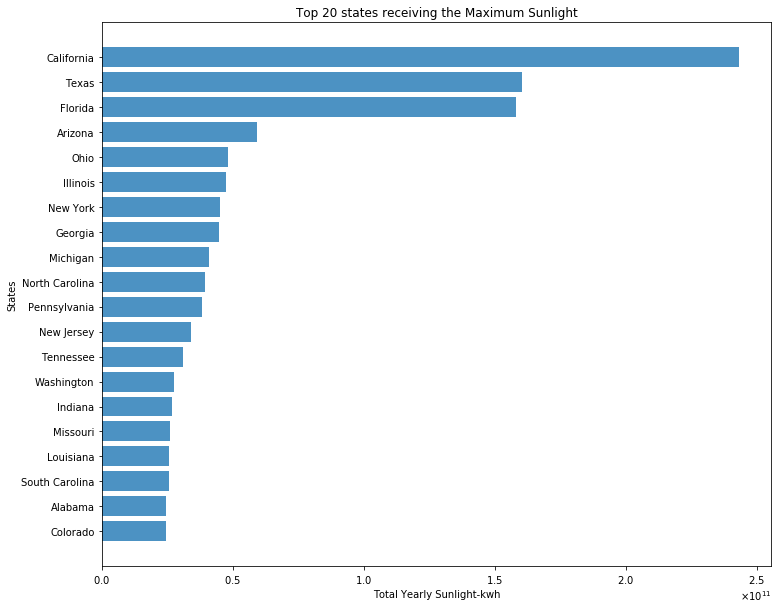

<Figure size 432x288 with 0 Axes>

In [23]:
df_state.sort_values(by= ['yearly_sunlight_kwh_total', 'state_name'], ascending = False, inplace = True)
plt.figure(figsize=(12,10))
plt.barh(df_state.state_name.head(20),
         df_state.yearly_sunlight_kwh_total.head(20),
         align='center', alpha=0.8)
plt.xlabel('Total Yearly Sunlight-kwh')
plt.ylabel('States')
plt.title('Top 20 states receiving the Maximum Sunlight')
ax = plt.gca()
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.xaxis.set_major_formatter(formatter) 
ax.invert_yaxis()
plt.show()
plt.tight_layout()

### States where the buildings are suitable for solar
A map has been plotted showing the statewise distribution of buildings which are suitable for solar.

Then the top 20 states are showing the same.

In [24]:
data = [go.Choropleth(
    autocolorscale = True,
    locations = df_state.state_abbr,
    z = df_state['count_qualified'],
    locationmode = 'USA-states',
    text = df_state['state_name'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Count of no. of buuilding")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'Number of Buildings Qualififed for Solar, Statewise<br> (Hover for Breakdown)'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
iplot(fig)

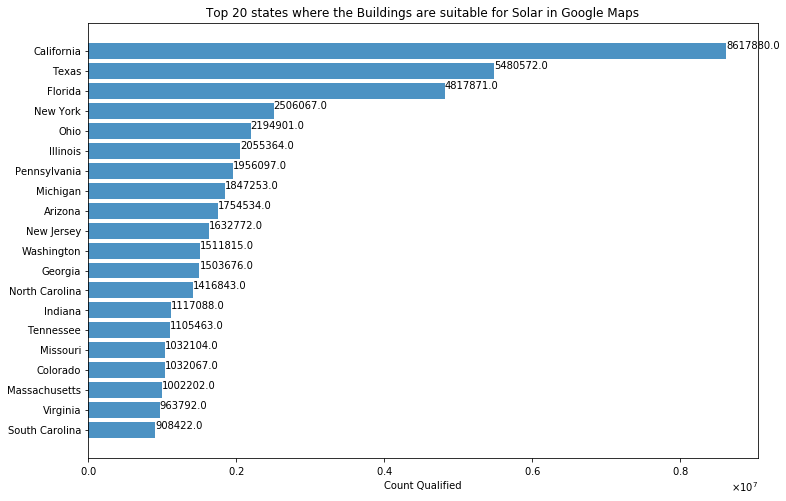

<Figure size 432x288 with 0 Axes>

In [25]:
df_state.sort_values(by= ['count_qualified', 'state_name'], ascending = False, inplace = True)
plt.figure(figsize=(12,8))
plt.barh(df_state.state_name.head(20),
         df_state.count_qualified.head(20), 
         align='center', alpha=0.8)
plt.xlabel('Count Qualified')
plt.title('Top 20 states where the Buildings are suitable for Solar in Google Maps')
ax = plt.gca()

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.xaxis.set_major_formatter(formatter) 

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.1, i.get_y()+0.31, \
            str(round((i.get_width()), 2)), color='black')
ax.invert_yaxis()
plt.show()
plt.tight_layout()

### States with the most  suitable regions qualified for sunroof
This plot shows, top 20 state containing the most suitable regions for solar panel installation.

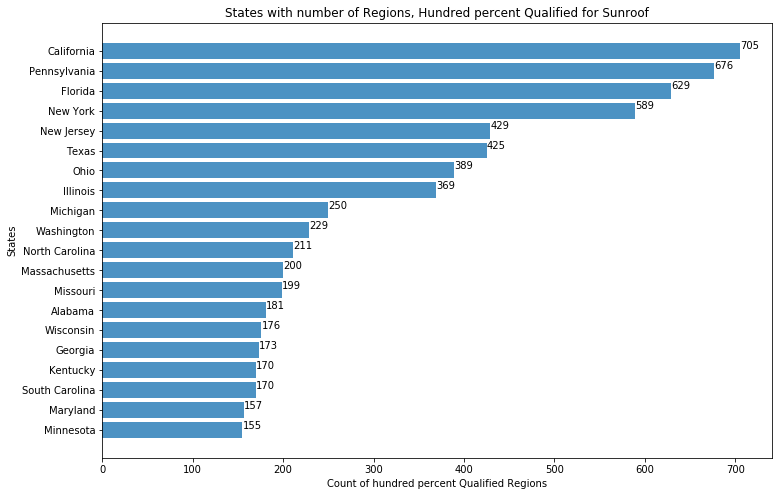

<Figure size 432x288 with 0 Axes>

In [26]:
plt.figure(figsize=(12,8))
plt.barh(citi.state_name.head(20),
         citi.percent_qualified.head(20),
         align='center', alpha=0.8)
plt.xlabel('Count of hundred percent Qualified Regions')
plt.ylabel('States')
plt.title('States with number of Regions, Hundred percent Qualified for Sunroof')
ax = plt.gca()
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.1, i.get_y()+0.31, \
            str(round((i.get_width()), 2)), color='black')
ax.invert_yaxis()
plt.show()
plt.tight_layout()

### States with Maximum number of solar panels possible
This plot shows the states with maximum number of sonal panel installations.

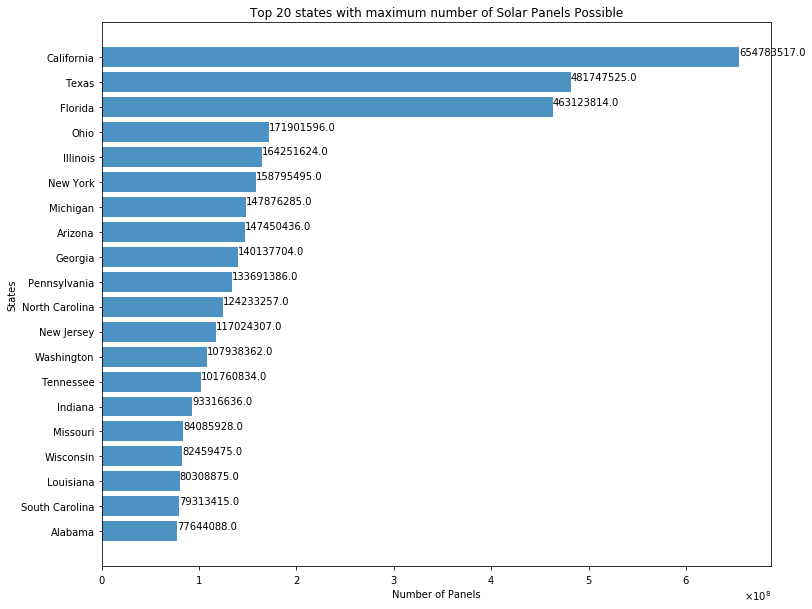

<Figure size 432x288 with 0 Axes>

In [27]:
df_state.sort_values(by= ['number_of_panels_total', 'state_name'], ascending = False, inplace = True)
plt.figure(figsize=(12,10))
plt.barh(df_state.state_name.head(20),
         df_state.number_of_panels_total.head(20),
         align='center', alpha=0.8)
plt.xlabel('Number of Panels')
plt.ylabel('States')
plt.title('Top 20 states with maximum number of Solar Panels Possible')
ax = plt.gca()
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.1, i.get_y()+0.31, \
            str(round((i.get_width()), 2)), color='black')
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.xaxis.set_major_formatter(formatter) 
ax.invert_yaxis()
plt.show()
plt.tight_layout()

## Insights
From the plots, there are few states which are most suitable for solar panel installtions, such as California, Texas, Florida, Arizona, New York, New Jersey etc. The solar panels can be installed in the northern USA as well but it will not yeild superior results as compared to these states.

# Analysis

## Electricity Savings
Based upon certain assumptions, I have calculated electricity savings. If we install a system of 5kW and lets say, the energy of the sun received is 250w -year per area. (Google Sunroof data Assumptions).

The savings are calculated in the following manner, (PV = Photovaltic system a.k.a for solar panel)

Energy from the PV system = (kW of PV) x (kWh/kW-year) = kWh/year

We have assumed kW of PV to be 5kw.
<br>kWh = Yearly Consumption from Electricity Data
<br>kW - year = 0.25 kW (assumed, google sunroof data)
<br>Divide this number by 12 if you want to determine your monthly energy reduction.

Energy bills savings = (kWh/year) x (Residential Rate)/100 = $/year saved

<br>(Residential Rate in this above equation should be in dollars per kWh; for example,a rate of 10 cents per kWh is input as $0.10/kWh.)

The savings is calculated with the help of savings().


In [28]:
save = savings(df_electricity)
sa = pd.DataFrame(save).reset_index()
sa.head()

,index,0
0,3,335.928
1,4,209.292
2,5,280.469
3,6,275.887
4,7,253.819


Few More calculated fields are added to the dataframe.

In [29]:
df_electricity['Avg yearly savings($)'] = pd.DataFrame(save)
df_electricity['Reduced bill'] = df_electricity['Avg yearly Bill'] - df_electricity['Avg yearly savings($)']
df_electricity['percentage_savings(%)'] = (df_electricity['Avg yearly savings($)'] / df_electricity['Avg yearly Bill'])*100
df_electricity.head()

1,State,Number of Customers,Average Monthly Consumption (kWh),Average Price (cents/kWh),Average Monthly Bill (Dollar and cents),state_abbr,Avg yearly consumption,Avg yearly Bill,Average price ($/kWh),Avg yearly savings($),Reduced bill,percentage_savings(%)
3,Connecticut,1495577,689.785,20.2918,139.97,CT,8277.42,1679.64,0.202918,335.928,1343.71,20
4,Maine,707792,546.127,15.9679,87.2051,ME,6553.53,1046.46,0.159679,209.292,837.169,20
5,Massachusetts,2766154,582.572,20.0597,116.862,MA,6990.86,1402.34,0.200597,280.469,1121.87,20
6,New Hampshire,618356,598.563,19.2048,114.953,NH,7182.75,1379.43,0.192048,275.887,1103.55,20
7,Rhode Island,437124,577.309,18.3191,105.758,RI,6927.71,1269.09,0.183191,253.819,1015.28,20


Filtering the electricity data to plot few more reults.

In [30]:
df_ele = df_electricity.filter(['State','state_abbr','Avg yearly Bill','Reduced bill','Avg yearly savings($)',
                                'percentage_savings(%)'])

In [31]:
df_ele = pd.merge(df_ele, df_state) #merging the electricity and state datasets
df_ele.drop(columns = ['region_name','state_name','lat_max','lat_min','lng_max','lng_min','lat_avg','lng_avg','count_qualified',
                       'percent_covered','percent_qualified','number_of_panels_n','number_of_panels_s','number_of_panels_e',
                      'number_of_panels_w','number_of_panels_f','number_of_panels_median','kw_median','kw_total','yearly_sunlight_kwh_n',
                      'yearly_sunlight_kwh_s','yearly_sunlight_kwh_e','yearly_sunlight_kwh_w','yearly_sunlight_kwh_f','yearly_sunlight_kwh_median',
                      'install_size_kw_buckets_json','carbon_offset_metric_tons','yearly_sunlight_kwh_kw_threshold_avg'], inplace = True)
df_ele.sort_values(by= ['existing_installs_count'], ascending = False, inplace = True)
df_ele.head()

,State,state_abbr,Avg yearly Bill,Reduced bill,Avg yearly savings($),percentage_savings(%),number_of_panels_total,yearly_sunlight_kwh_total,existing_installs_count
45,California,CA,1217.93,974.342,243.586,20,654783517.0,2.433046e+11,331810.0
22,Florida,FL,1517.24,1213.79,303.448,20,463123814.0,1.579716e+11,105364.0
37,Arizona,AZ,1540.78,1232.63,308.157,20,147450436.0,5.912789e+10,39725.0
49,Hawaii,HI,1792.01,1433.61,358.401,20,19873246.0,7.415195e+09,25392.0
38,Colorado,CO,989.599,791.679,197.92,20,69425443.0,2.466701e+10,24360.0


### Reduction in the Electricity Bill
The following plot shows the top 10 states, wherein the average yearly reduced electricity bill is shown alongside average yearly electricity bill. The states are filtered with respect to the maximu number of possible solar panel installation, considering only one 5kW system. If the system of more power are installed, the savings would be more. The reduced bills are roughly 20% less than the original bill.

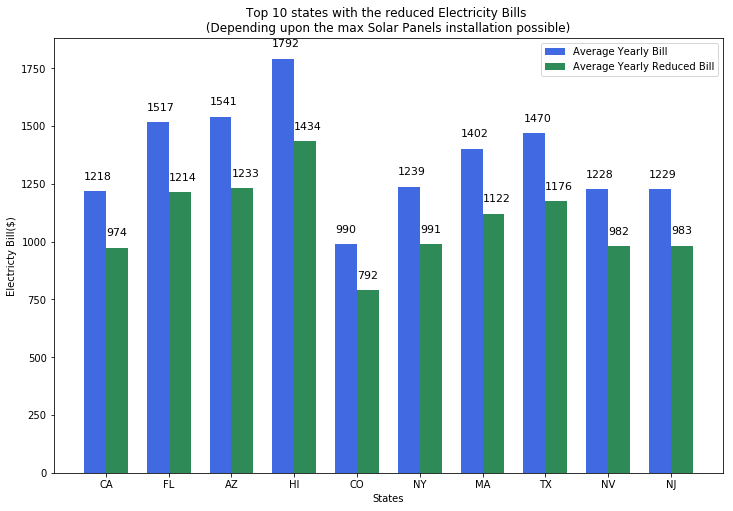

In [32]:
N = 10

ind = np.arange(N) # the x locations for the groups
#ind = ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
width = 0.35       # the width of the bars

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, df_ele['Avg yearly Bill'].head(10), width, color='royalblue')

rects2 = ax.bar(ind+width, df_ele['Reduced bill'].head(10), width, color='seagreen')

# add some
ax.set_xlabel('States')
ax.set_ylabel('Electricty Bill($)')
ax.set_title('Top 10 states with the reduced Electricity Bills \n (Depending upon the max Solar Panels installation possible) ')
ax.set_xticks(ind + width /2)
ax.set_xticklabels( ['CA','FL','AZ','HI','CO','NY','MA','TX','NV','NJ'] )

ax.legend( (rects1[0], rects2[0]), ('Average Yearly Bill', 'Average Yearly Reduced Bill') )


for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+50, \
            str(round((i.get_height()))), fontsize=11, color='black',
                rotation=360)

plt.show()

The below map shows the states, wherein the sunlight is maximum, with corresponding reduced bill and  percentages yearly savings.

In [33]:
txt = 'No of Solar Panels, estimated(Google Sunroof): '  + df_ele['number_of_panels_total'].apply(str) + '<br>' +\
'Average Yearly Electricity Bill($): ' +  df_ele['Avg yearly Bill'].apply(str) + '<br>' +\
'Average Yearly Reduced Electricity Bill($): ' + df_ele['Reduced bill'].apply(str) + '<br>' +\
'Percent Savings(%): ' + df_ele['percentage_savings(%)'].apply(str)
    
data = [go.Choropleth(
    autocolorscale = True,
    locations = df_ele.state_abbr,
    z = df_ele['yearly_sunlight_kwh_total'],
    locationmode = 'USA-states',
    text = txt,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Count of Sunlight(kWh)")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'Statewise Percentage Savings In Electricity Bill <br> Depending upon max Sunlight received <br> (Hover for Breakdown)'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
iplot(fig)

# Carbon Offset Potential

A carbon offset is an investment in an activity that reduces carbon emissions. The reduction in carbon emissions is represented by a carbon credit. The credit, usually verified by a third party, signifies that greenhouse gas emissions are lower than they would have been had no one invested in the offset. One credit equals one metric ton of carbon dioxide prevented from entering the atmosphere. The credit purchaser can use the credit for carbon accounting. l we can power our operations entirely with renewables or reduce our emissions in other ways, we can use the offsets to fund projects that reduce greenhouse gas emissions, indirectly reducing our total carbon footprint. When we apply that credit to our carbon footprint, it offsets our emissions from using non-renewable energy.

There are many projects which will lead to carbon offsets. Using solar panel is one of them. We will plotting the top 50 cities where the carbon offset potential is the maximum. 

In [34]:
df_city.sort_values(by= ['carbon_offset_metric_tons'], ascending = False, inplace = True)

tt = df_city['region_name'].apply(str)+'<br>'+'Carbon offset(metric tons): ' + df_city['carbon_offset_metric_tons'].apply(str)
#limits = [(0,1000),(1000,10000),(10000,100000),(100000,1000000),(1000000,10000000)]
limits =[(0,10000000)]
colors = ["rgb(255,133,27)"]
#colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]
cities = []
scale = 5000

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df_city[lim[0]:lim[1]]
    city = go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['lng_avg'].head(50),
        lat = df_sub['lat_avg'].head(50),
        text = tt,
        marker = go.scattergeo.Marker(
            size = df_sub['carbon_offset_metric_tons']/1e4,
            color = colors[i],
            line = go.scattergeo.marker.Line(
                width=0.5, color='rgb(40,40,40)'
            ),
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1]) )
    cities.append(city)

layout = go.Layout(
        title = go.layout.Title(
            text = 'Top 50 Cities with Potential carbon Offset<br>(Hover for Break Down)'
        ),
        showlegend = False,
        geo = go.layout.Geo(
            scope = 'usa',
            projection = go.layout.geo.Projection(
                type='albers usa'
            ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        )
    )

fig = go.Figure(data=cities, layout=layout)
iplot(fig, filename='d3-bubble-map-populations')

### Prediction

The more the carbon offset potential the less will be the pollution. We will be predicting the carbon offset based on the following factors, sunlight, region, number of solar panels(existing and total) and number of buildings suitable for sunroof.

The dataset used is of city to predict the values.

#### Model 1

In [35]:
#filtered city data with needed variables
df_city_filtered = df_city.filter(['yearly_sunlight_kwh_total','number_of_panels_total','kw_total','count_qualified',
                                   'percent_qualified','carbon_offset_metric_tons','existing_installs_count',
                                   'lat_avg','lng_avg','number_of_panels_median','yearly_sunlight_kwh_median',
                                  'kw_median']).dropna()

In [36]:
#independent variables
X = df_city_filtered[['yearly_sunlight_kwh_total','number_of_panels_total','kw_total','count_qualified',
                                   'percent_qualified','existing_installs_count',
                                   'lat_avg','lng_avg','number_of_panels_median','yearly_sunlight_kwh_median',
                                  'kw_median']]
#dependent variables
y = df_city_filtered[['carbon_offset_metric_tons']]

#making train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [37]:
#fitting the lmmodel
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
print('Intercept: ',lm.intercept_) #intercept

Intercept:  [100356.08552248]


In [39]:
p =pd.DataFrame(lm.coef_)
p.columns = X.columns
p = pd.melt(p)
p #printing the coeffecients

,variable,value
0,yearly_sunlight_kwh_total,-0.000005
1,number_of_panels_total,0.189388
2,kw_total,0.047347
3,count_qualified,-0.685418
4,percent_qualified,-39.016821
5,existing_installs_count,-102.255301
6,lat_avg,-1288.953544
7,lng_avg,562.631943
8,number_of_panels_median,8.523575
9,yearly_sunlight_kwh_median,-0.028904


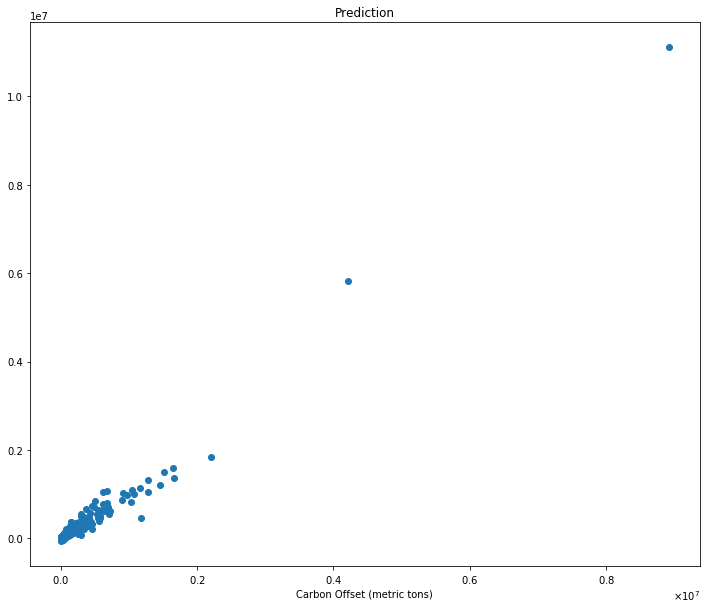

<Figure size 432x288 with 0 Axes>

In [40]:
predictions_xy = lm.predict(X_test) #prediction
plt.figure(figsize=(12,10))
plt.scatter(y_test,predictions_xy)
plt.xlabel('Carbon Offset (metric tons)')
plt.title('Prediction')
ax = plt.gca()
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.xaxis.set_major_formatter(formatter) 
plt.show()
plt.tight_layout()

The plot shows that the carbon offset will increase, based upon the dependent variables we have choosen. We will tune the model depending upon the coeffecients and drop the coeffecients whose value is greater than 0.05 to tune the model more.

#### Model 2

In [41]:
#independent variables
var = df_city_filtered[['yearly_sunlight_kwh_total','count_qualified','lat_avg','kw_total',
                                   'percent_qualified','existing_installs_count','yearly_sunlight_kwh_median']]

#dependent variable
tar = df_city_filtered[['carbon_offset_metric_tons']]

#train and test data
var_train, var_test, tar_train, tar_test = train_test_split(var, tar, test_size=0.2, random_state=101)

In [42]:
#fitting lm model
lm = LinearRegression()
lm.fit(var_train,tar_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
print('Intercept: ',lm.intercept_) #intercept

Intercept:  [62533.25603884]


In [44]:
q =pd.DataFrame(lm.coef_)
q.columns = var.columns
q = pd.melt(q)
q #coefficients

,variable,value
0,yearly_sunlight_kwh_total,-0.000010
1,count_qualified,-0.721958
2,lat_avg,-1295.823026
3,kw_total,0.813270
4,percent_qualified,-184.547913
5,existing_installs_count,-106.138443
6,yearly_sunlight_kwh_median,-0.000880


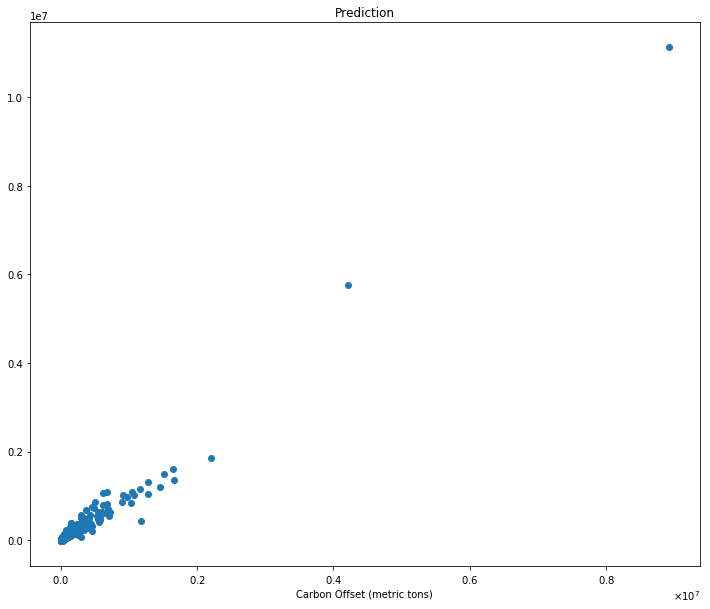

<Figure size 432x288 with 0 Axes>

In [45]:
#prediction and plotting
predictions_tar = lm.predict(var_test)
plt.figure(figsize=(12,10))
plt.scatter(tar_test,predictions_tar)
plt.xlabel('Carbon Offset (metric tons)')
plt.title('Prediction')
ax = plt.gca()
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.xaxis.set_major_formatter(formatter) 
plt.show()
plt.tight_layout()

#### Model 3

In [46]:
#independent variables
varr = df_city_filtered[['yearly_sunlight_kwh_total','count_qualified','lat_avg',
                                   'percent_qualified','existing_installs_count','yearly_sunlight_kwh_median']]
#dependent variables
tarr = df_city_filtered[['carbon_offset_metric_tons']]

#train and test data
varr_train, varr_test, tarr_train, tarr_test = train_test_split(varr, tarr, test_size=0.2, random_state=101)

#fitting lm model
lm = LinearRegression()
lm.fit(varr_train,tarr_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
print('Intercept :',lm.intercept_)

Intercept : [43487.43547309]


In [48]:
r =pd.DataFrame(lm.coef_)
r.columns = varr.columns
r = pd.melt(r)
r #coefficients

,variable,value
0,yearly_sunlight_kwh_total,0.000474
1,count_qualified,3.075747
2,lat_avg,-812.774326
3,percent_qualified,-135.134966
4,existing_installs_count,-149.427262
5,yearly_sunlight_kwh_median,-0.001915


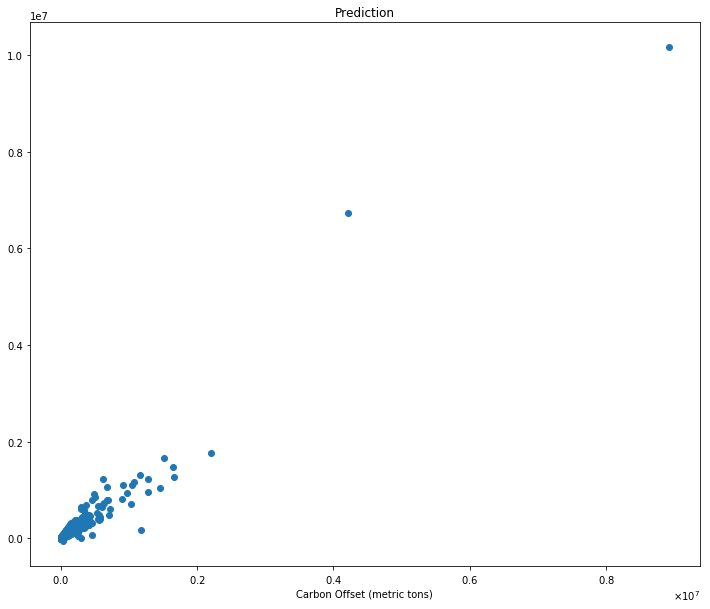

<Figure size 432x288 with 0 Axes>

In [49]:
#prediction and plotting
predictions_tarr = lm.predict(varr_test)
plt.figure(figsize=(12,10))
plt.scatter(tarr_test,predictions_tarr)
plt.xlabel('Carbon Offset (metric tons)')
plt.title('Prediction')
ax = plt.gca()
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.xaxis.set_major_formatter(formatter) 
plt.show()
plt.tight_layout()

The coefficients are excluded in both the models, Model 2 and Model 3 depending upon the value of the coefficients.

### Error Analysis
Based upon the three models the errors are calculated for all the three models.

* Mean absolute error : Mean absolute error (MAE) is a measure of difference between two continuous variables.

* Mean squared error : The mean squared error (MSE) or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and what is estimated. MSE is a risk function, corresponding to the expected value of the squared error loss.

* Root mean squared error : The root-mean-square deviation or root-mean-square error is a frequently used measure of the differences between values predicted by a model or an estimator and the values observed.

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_xy))
print('MSE:', metrics.mean_squared_error(y_test, predictions_xy))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_xy)))

MAE: 20291.708759199308
MSE: 6359481125.732125
RMSE: 79746.35493696327


In [51]:
print('MAE:', metrics.mean_absolute_error(tar_test, predictions_tar))
print('MSE:', metrics.mean_squared_error(tar_test, predictions_tar))
print('RMSE:', np.sqrt(metrics.mean_squared_error(tar_test, predictions_tar)))

MAE: 19694.506831169187
MSE: 6369158640.676488
RMSE: 79807.00871901218


In [52]:
print('MAE:', metrics.mean_absolute_error(tarr_test, predictions_tarr))
print('MSE:', metrics.mean_squared_error(tarr_test, predictions_tarr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(tarr_test, predictions_tarr)))

MAE: 21749.288344818535
MSE: 7835581435.32837
RMSE: 88518.81966750557


The RMSE of the model 2 is the lowest and we can go ahead with the second model.

### Steps to increase Carbon Offset
The carbon offset can be increased, considering solar panels System; by increasing the solar panels. We will see the states which contains the maximum carbon offset potential regions and then we will see how many solar panels can be installed in the ranges of 0 kW to 8 mW.

In [53]:
df_city = df_city[df_city.carbon_offset_metric_tons.notna()]

#getting the city where Carbon Offset Potential is max
carbon = df_city.groupby(by = ['state_name'], axis = 0)['carbon_offset_metric_tons'].sum() 
carb = pd.DataFrame(carbon).reset_index()
carb.sort_values(by= ['carbon_offset_metric_tons'], ascending = False, inplace = True)
carb.head(10)

,state_name,carbon_offset_metric_tons
42,Texas,6.845444e+07
8,Florida,6.469856e+07
4,California,6.212725e+07
12,Illinois,3.558653e+07
34,Ohio,3.201287e+07
21,Michigan,2.804899e+07
2,Arizona,2.390995e+07
29,New Jersey,2.036448e+07
41,Tennessee,2.013222e+07
32,North Carolina,1.897927e+07


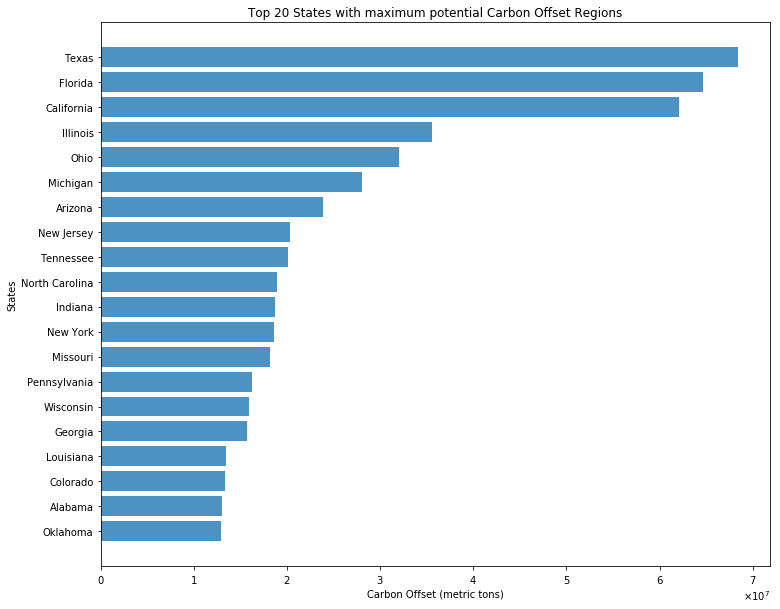

<Figure size 432x288 with 0 Axes>

In [54]:
plt.figure(figsize=(12,10))
#barplot
plt.barh(carb.state_name.head(20),
         carb.carbon_offset_metric_tons.head(20),
         align='center', alpha=0.8)
plt.xlabel('Carbon Offset (metric tons)')
plt.ylabel('States')
plt.title('Top 20 States with maximum potential Carbon Offset Regions')
ax = plt.gca()
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.xaxis.set_major_formatter(formatter) 
ax.invert_yaxis()
plt.show()
plt.tight_layout()

Converting the 'install_size_kw_buckets_json' into bucket ranges from 0 kW to 8mW for top three states, Texas, Florida, California from the above plot.

In [55]:
import json
#for texas data
df_texas = df_state[df_state['state_name'] == 'Texas']
df_texas
#loading json data
bucket_texas = df_texas['install_size_kw_buckets_json'].apply(json.loads) 
#converting into list
buckets_texas = list(bucket_texas)
#converting into dataframe
buckpd_texas = pd.DataFrame(buckets_texas).reset_index(drop=True) 
buckpd_texas.dropna(inplace =True)
buckpd_texas_melt = pd.melt(buckpd_texas) #converting into one column

buckpd_texas_melt[['bucket_kW','no_of_buildings']] = pd.DataFrame(buckpd_texas_melt.value.values.tolist(), 
                                                                  index= buckpd_texas_melt.index)
#converting into ranges
bins = pd.cut(buckpd_texas_melt['bucket_kW'], [0, 100, 1000, 2500, 5000, 8500]) 
tx = buckpd_texas_melt.groupby(bins)['bucket_kW'].agg(['count', 'sum'])
tx.columns = ['count_tx','sum_tx']
tx['range'] = ['0 - 100', '100 - 1000','1000 - 2500','2500 - 5000','5000 - 8500']
tx

,count_tx,sum_tx,range
bucket_kW,,,
"(0, 100]",20,1050,0 - 100
"(100, 1000]",180,99450,100 - 1000
"(1000, 2500]",300,525750,1000 - 2500
"(2500, 5000]",321,1116325,2500 - 5000
"(5000, 8500]",40,221480,5000 - 8500


In [56]:
#for florida
df_florida = df_state[df_state['state_name'] == 'Florida']

bucket_florida = df_florida['install_size_kw_buckets_json'].apply(json.loads)
buckets_florida = list(bucket_florida)
buckpd_florida = pd.DataFrame(buckets_florida).reset_index(drop=True)
buckpd_florida.dropna(inplace =True)
buckpd_florida_melt = pd.melt(buckpd_florida)

buckpd_florida_melt[['bucket_kW','no_of_buildings']] = pd.DataFrame(buckpd_florida_melt.value.values.tolist(), 
                                                                  index= buckpd_florida_melt.index)
bins = pd.cut(buckpd_florida_melt['bucket_kW'], [0, 100, 1000, 2500, 5000, 8500])
fl = buckpd_florida_melt.groupby(bins)['bucket_kW'].agg(['count', 'sum'])
fl.columns = ['count_fl','sum_fl']
fl['range'] = ['0 - 100', '100 - 1000','1000 - 2500','2500 - 5000','5000 - 8500']
fl

,count_fl,sum_fl,range
bucket_kW,,,
"(0, 100]",20,1050,0 - 100
"(100, 1000]",180,99450,100 - 1000
"(1000, 2500]",298,520925,1000 - 2500
"(2500, 5000]",225,750615,2500 - 5000
"(5000, 8500]",20,121180,5000 - 8500


In [57]:
#for california
df_cali = df_state[df_state['state_name'] == 'California']

bucket_cali = df_cali['install_size_kw_buckets_json'].apply(json.loads)
buckets_cali = list(bucket_cali)
buckpd_cali = pd.DataFrame(buckets_cali).reset_index(drop=True)
buckpd_cali.dropna(inplace =True)
buckpd_cali_melt = pd.melt(buckpd_cali)

buckpd_cali_melt[['bucket_kW','no_of_buildings']] = pd.DataFrame(buckpd_cali_melt.value.values.tolist(), 
                                                                  index= buckpd_cali_melt.index)
bins = pd.cut(buckpd_cali_melt['bucket_kW'], [0, 100, 1000, 2500, 5000, 8500])
ca = buckpd_cali_melt.groupby(bins)['bucket_kW'].agg(['count', 'sum'])
ca.columns = ['count_ca','sum_ca']
ca['range'] = ['0 - 100', '100 - 1000','1000 - 2500','2500 - 5000','5000 - 8500']
ca

,count_ca,sum_ca,range
bucket_kW,,,
"(0, 100]",20,1050,0 - 100
"(100, 1000]",180,99450,100 - 1000
"(1000, 2500]",299,523575,1000 - 2500
"(2500, 5000]",298,1031380,2500 - 5000
"(5000, 8500]",62,360420,5000 - 8500


In [58]:
#merging into one
df_txfl = pd.merge(tx,fl)
df_merged = pd.merge(ca,df_txfl)
df_merged

,count_ca,sum_ca,range,count_tx,sum_tx,count_fl,sum_fl
0,20,1050,0 - 100,20,1050,20,1050
1,180,99450,100 - 1000,180,99450,180,99450
2,299,523575,1000 - 2500,300,525750,298,520925
3,298,1031380,2500 - 5000,321,1116325,225,750615
4,62,360420,5000 - 8500,40,221480,20,121180


The following plot shows the ranges of the solar panel system available in the top three states with maximum carbon offset potential regions. When the maximum solar panels are installed irrespective of the solar panel sizes, the carbon offset is possible. Depending upon the data from google, we have the following bins of solar panels. These are just top three states, if we consider installation of solar panel in entire USA, the carbon offset potential will surely increase. For the top three states, the maximum solar panels can be installed in 1 - 5 mW ranges.

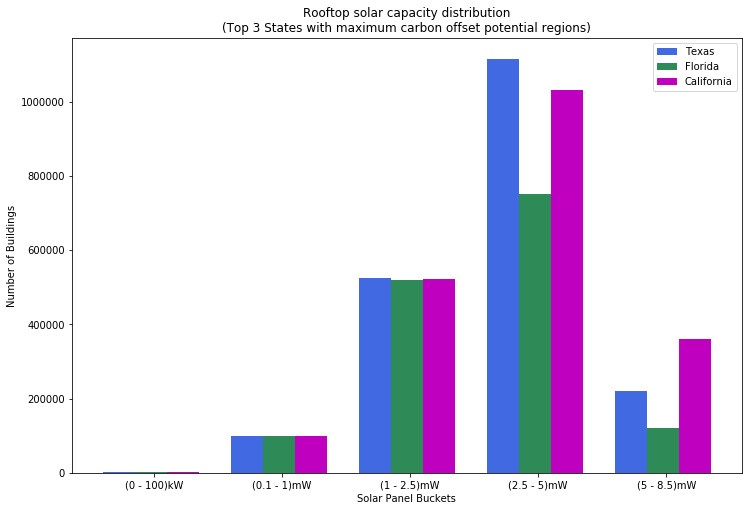

In [59]:
N = 5

ind = np.arange(N) # the x locations for the groups
width = 0.25       # the width of the bars

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, df_merged['sum_tx'], width, color='royalblue')

rects2 = ax.bar(ind+width, df_merged['sum_fl'], width, color='seagreen')

rects3 = ax.bar(ind+width+width, df_merged['sum_ca'], width, color='m')

# add some
ax.set_xlabel('Solar Panel Buckets')
ax.set_ylabel('Number of Buildings')
ax.set_title('Rooftop solar capacity distribution\n(Top 3 States with maximum carbon offset potential regions)')
ax.set_xticks(ind + width +width /10)
ax.set_xticklabels( ['(0 - 100)kW', '(0.1 - 1)mW','(1 - 2.5)mW','(2.5 - 5)mW','(5 - 8.5)mW'] )

ax.legend( (rects1[0], rects2[0], rects3[0]), ('Texas', 'Florida', 'California') )


plt.show()

With the importance of solar energy and its impact on our environment in our mind, our project was an attempt to encourage people to adapt to roof top solar. We have various perks after installing the solar panels, our money is saved and we save our environment as well. 

Carbon offsets are still very new. In fact, it’s entirely possible that how we offset our emissions a few years from now will be very different from how we do it today. Our offsets may be more personalized, more local and rely on emergent technologies that have a global impact. We as humans should hope to be part of the evolution of these new offsets, and will continue to foster current offset projects through research, collaboration and investment. 